In [45]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [29]:
# Load the different dataset 

country_df = pd.read_csv(r'C:\Users\raque\OneDrive\Documentos\Portfolio\GlobalEV\country_summary_2025.csv')
model_df = pd.read_csv(r'C:\Users\raque\OneDrive\Documentos\Portfolio\GlobalEV\ev_models_2025.csv')
world_df = pd.read_csv(r'C:\Users\raque\OneDrive\Documentos\Portfolio\GlobalEV\world_summary_2025.csv')
charging_df = pd.read_csv(r'C:\Users\raque\OneDrive\Documentos\Portfolio\GlobalEV\charging_stations_2025_world.csv')


In [31]:
# Quick look
print("Country Summary:")
print(country_df.head())

print("\nEV Models:")
print(model_df.head())

print("\nWorld Summary:")
print(world_df.head())

print("\nCharging stations:")
print(charging_df.head())



Country Summary:
  country_code  stations
0           US     82138
1           GB     26825
2           DE     23373
3           ES     17825
4           CA     16490

EV Models:
    make       model           market_regions powertrain  first_year  \
0  Tesla     Model S     Global (US/EU/UK/ME)        BEV        2012   
1  Tesla     Model 3  Global (US/EU/UK/ME/CN)        BEV        2017   
2  Tesla     Model X     Global (US/EU/UK/ME)        BEV        2015   
3  Tesla     Model Y  Global (US/EU/UK/ME/CN)        BEV        2020   
4  Tesla  Cybertruck             US (limited)        BEV        2023   

  body_style origin_country  
0      Sedan             US  
1      Sedan             US  
2        SUV             US  
3        SUV             US  
4     Pickup             US  

World Summary:
  country_code         country  count  max_power_kw_max
0           US   United States  83821             600.0
1           GB  United Kingdom  27437             560.0
2           DE         G

In [37]:
# General info (columns, data types, nulls)
print("\nCountry Summary Info:")
print(country_df.info())

print("\nEV Models Info:")
print(model_df.info())

print("\nWorld Summary Info:")
print(world_df.info())

print("\nCharging stations Info:")
print(charging_df.info())


Country Summary Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country_code  121 non-null    object
 1   stations      122 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.0+ KB
None

EV Models Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   make            63 non-null     object
 1   model           63 non-null     object
 2   market_regions  63 non-null     object
 3   powertrain      63 non-null     object
 4   first_year      63 non-null     int64 
 5   body_style      63 non-null     object
 6   origin_country  63 non-null     object
dtypes: int64(1), object(6)
memory usage: 3.6+ KB
None

World Summary Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entri

In [39]:
# Find rows with missing country_code in country_df
missing_country_code = country_df[country_df['country_code'].isnull()]
print("Rows with missing country_code in country_df:")
print(missing_country_code)

# Find rows with missing max_power_kw_max in world_df
missing_power = world_df[world_df['max_power_kw_max'].isnull()]
print("\nRows with missing max_power_kw_max in world_df:")
print(missing_power)

Rows with missing country_code in country_df:
    country_code  stations
113          NaN         1

Rows with missing max_power_kw_max in world_df:
    country_code                 country  count  max_power_kw_max
109           GT               Guatemala      1               NaN
111           UZ              Uzbekistan      1               NaN
118           BB                Barbados      1               NaN
121           SJ  Svalbard And Jan Mayen      1               NaN


In [41]:
# Cleaning data 

country_df_clean = country_df.dropna(subset=['country_code'])

world_df['max_power_kw_max'] = world_df['max_power_kw_max'].fillna(0)

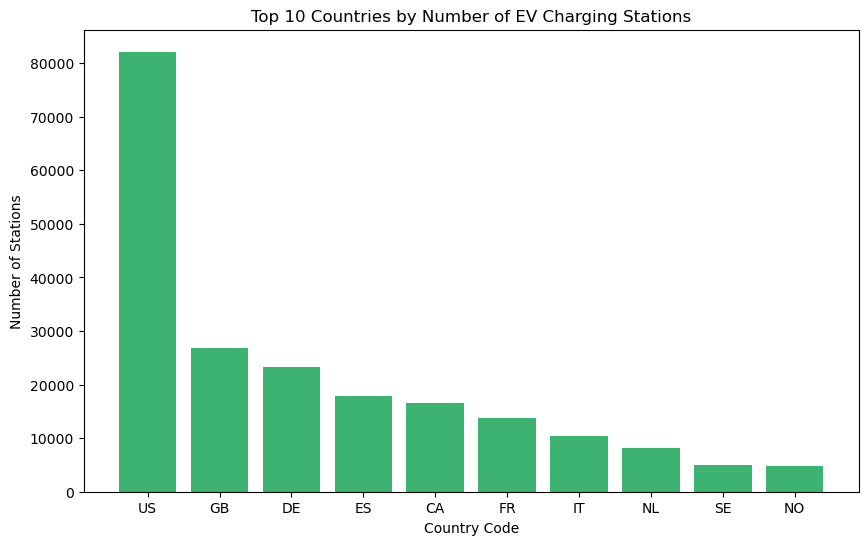

In [47]:
# Top 10 countries with more Charging Stations 

top_countries = country_df_clean.sort_values('stations', ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.bar(top_countries['country_code'], top_countries['stations'], color='mediumseagreen')
plt.title('Top 10 Countries by Number of EV Charging Stations')
plt.xlabel('Country Code')
plt.ylabel('Number of Stations')
plt.show()

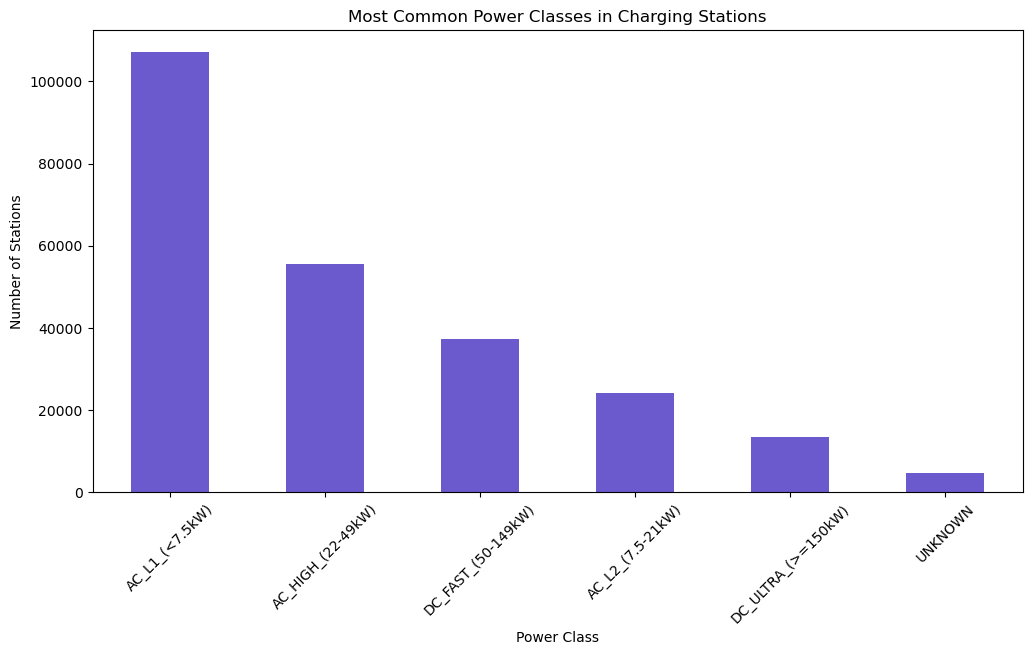

In [53]:
# Most Common Power Classes in Charging Stations

charging_power_counts = charging_df['power_class'].value_counts()
plt.figure(figsize=(12,6))
charging_power_counts.plot(kind='bar', color='slateblue')
plt.title('Most Common Power Classes in Charging Stations')
plt.xlabel('Power Class')
plt.ylabel('Number of Stations')
plt.xticks(rotation=45)
plt.show()

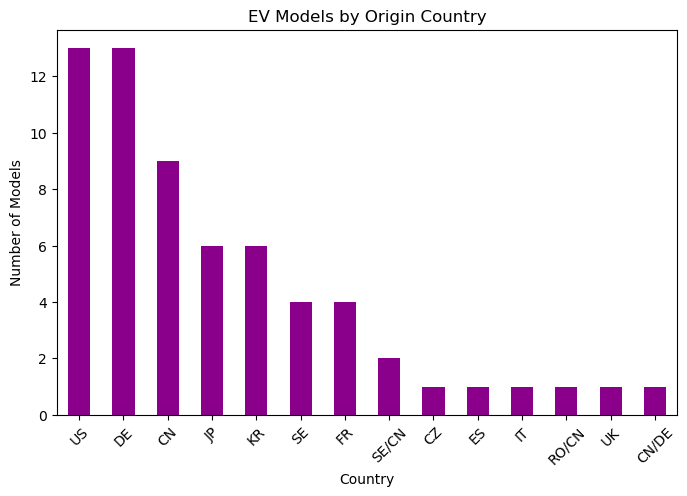

In [57]:
# EV Models by Origin Country

origin_counts = model_df['origin_country'].value_counts()
plt.figure(figsize=(8,5))
origin_counts.plot(kind='bar', color='darkmagenta')
plt.title('EV Models by Origin Country')
plt.xlabel('Country')
plt.ylabel('Number of Models')
plt.xticks(rotation=45)
plt.show()

  country_code  stations  population
0           US     82138   334000000
1           GB     26825    68000000
2           DE     23373    83000000
3           CA     16490    39000000
4           FR     13820    68000000


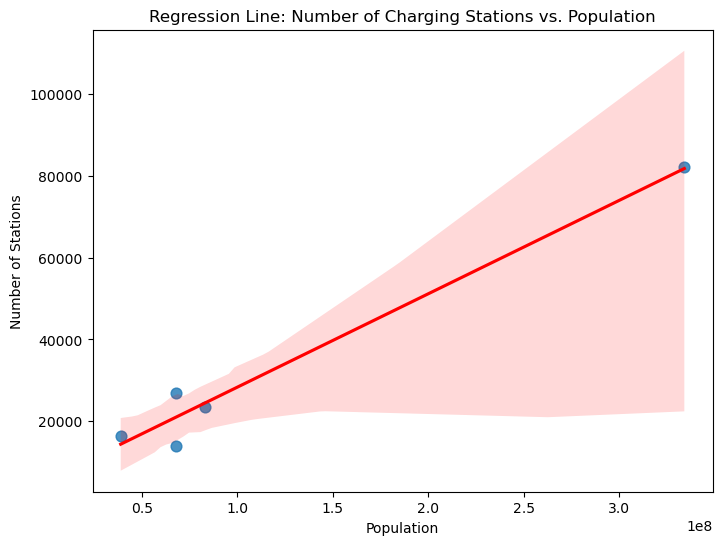

Pearson correlation coefficient: 0.986
  country_code  stations  population  stations_per_100k
0           US     82138   334000000          24.592216
1           GB     26825    68000000          39.448529
2           DE     23373    83000000          28.160241
3           CA     16490    39000000          42.282051
4           FR     13820    68000000          20.323529


In [65]:
# Now we are going to see the correlation between the population and 
# the number of charging stations on the country with a small subset
# First of all create a dataframe with the different population 

import seaborn as sns

pop_df = pd.DataFrame({
    'country_code': ['US', 'GB', 'DE', 'FR', 'CA'],
    'population': [334_000_000, 68_000_000, 83_000_000, 68_000_000, 39_000_000]
})

# Merge with your cleaned country stations data
subset_df = pd.merge(country_df_clean, pop_df, on='country_code', how='inner')

print(subset_df)

# Scatter plot: Number of stations vs. population
plt.figure(figsize=(8,6))
sns.regplot(x='population', y='stations', data=subset_df, scatter_kws={'s':60}, line_kws={'color':'red'})
plt.title('Regression Line: Number of Charging Stations vs. Population')
plt.xlabel('Population')
plt.ylabel('Number of Stations')
plt.show()

# Calculate and display the correlation coefficient
corr = subset_df['population'].corr(subset_df['stations'])
print(f"Pearson correlation coefficient: {corr:.3f}")

# Calculate stations per 100,000 people
subset_df['stations_per_100k'] = subset_df['stations'] / subset_df['population'] * 100000
print(subset_df[['country_code', 'stations', 'population', 'stations_per_100k']])